## FFTs_num_mults_Fig1: 
### This code is used to do the number of multiplications comparison for different DFTs.
#### 1. We need to call the function "opnums" to get the number of operations of the algorithm RV_DFT .
#### 2. We need to call the function "myfftpfa->myfft2pt->dftf->dfteig" to get the number of operations of the RV_FFT.

#### Coded by Weiwei Wang(ww20br@fsu.edu). 
#### Supervised by Prof. Victor DeBrunner (victor.debrunner@eng.famu.fsu.edu). 
#### Reviewed by Prof. Linda DeBrunner (linda.debrunner@eng.famu.fsu.edu).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numops import numops
from myfftpfa import myfftpfa

import globals

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
lb = 3
ub = 64
n = np.arange(lb, ub+1)

y = np.zeros((len(n), 4))

In [3]:
# Combine Prime Factor Algorithm (PFA) and Matveev's -> y[:,0]
# Recursively break down DFT into smaller DFTs.
# Use Matveev's eigenvectors for smaller DFTs.

inp = np.random.randint(-127, 128, ub)
for i in n:
    myfftpfa(np.c_[inp[:i]])
    y[i-lb, 0] = globals.a[0]
    globals.a = np.array([0, 0])

# Matveev's eigenvectors -> y[:,1]
for i in n:
    ops = numops(i, 'r')
    y[i-lb, 1] = ops[0]

# Brute force -> y[:,2]
y[:, 2] = 2 * (n - 1) ** 2

# Cooley-Tukey FFT -> y[:,3]
lb2 = int(np.ceil(np.log2(lb)))
ub2 = int(np.floor(np.log2(ub)))
n2 = 2 ** np.arange(lb2, ub2+1)
y[:, 3] = np.nan
for i in n2:
    y[i-lb, 3] = 2 * i * np.log2(i) - 6 * i + 8


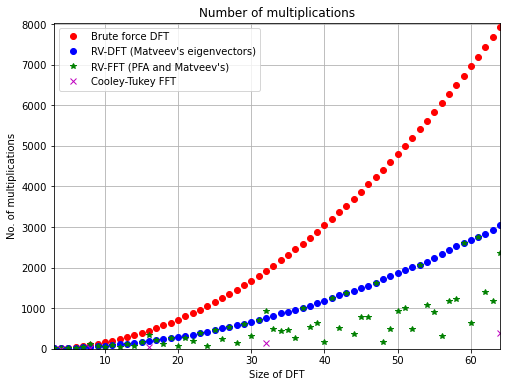

In [4]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(n, y[:, 2], 'ro', label='Brute force DFT')
plt.plot(n, y[:, 1], 'bo', label='RV-DFT (Matveev\'s eigenvectors)')
plt.plot(n, y[:, 0], 'g*', label='RV-FFT (PFA and Matveev\'s)')
plt.plot(n, y[:, 3], 'mx', label='Cooley-Tukey FFT')
plt.xlabel('Size of DFT')
plt.ylabel('No. of multiplications')
plt.title('Number of multiplications')
plt.grid(True)
plt.legend()
plt.xlim(lb, ub)
plt.ylim(0, np.nanmax(y) + 100)
plt.show()